## MPG Test

This dataset is a slightly modified version of the dataset provided in
the StatLib library.  In line with the use by Ross Quinlan (1993) in
predicting the attribute "mpg", 8 of the original instances were removed 
because they had unknown values for the "mpg" attribute.  The original 
dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon,
to be predicted in terms of 3 multivalued discrete and 5 continuous
attributes." (Quinlan, 1993)

The variables

    1. mpg:           continuous (Milles per gallon)
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

In [1]:
import re

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def load_data(file, csv_file):
    with open(file, 'r') as file:
        content = file.readlines()
    parsed_content = []
    for line in content:
        line = line.replace('\t', ',')
        split_line = line.split(',')
        replaced = re.sub('\s+', ';', split_line[0])
        parsed_content.append(f'{replaced};{split_line[1]}')

    with open(csv_file, 'w') as writer:
        for line in parsed_content:
            writer.writelines(line)
    columns_name = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]
    auto_mpg_data = pd.read_csv(csv_file, sep=';', names=columns_name)
    return columns_name, auto_mpg_data
    

In [3]:
columns_name, auto_mpg_data = load_data("auto-mpg.data-original", "auto-mpg.csv")
auto_mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [4]:
auto_mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   model_year    406 non-null    float64
 7   origin        406 non-null    float64
 8   car_name      406 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.7+ KB


### Missing values

In [5]:
# Checking the missing values in the dataset.
print(auto_mpg_data.isnull().sum())
auto_mpg_data[auto_mpg_data.isnull().any(axis=1)]

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
10,NaN,4.0,133.0,115.0,3090.0,17.5,70.0,2.0,citroen ds-21 pallas
11,NaN,8.0,350.0,165.0,4142.0,11.5,70.0,1.0,chevrolet chevelle concours (sw)
12,NaN,8.0,351.0,153.0,4034.0,11.0,70.0,1.0,ford torino (sw)
13,NaN,8.0,383.0,175.0,4166.0,10.5,70.0,1.0,plymouth satellite (sw)
14,NaN,8.0,360.0,175.0,3850.0,11.0,70.0,1.0,amc rebel sst (sw)
17,NaN,8.0,302.0,140.0,3353.0,8.0,70.0,1.0,ford mustang boss 302
38,25.0,4.0,98.0,NaN,2046.0,19.0,71.0,1.0,ford pinto
39,NaN,4.0,97.0,48.0,1978.0,20.0,71.0,2.0,volkswagen super beetle 117
133,21.0,6.0,200.0,NaN,2875.0,17.0,74.0,1.0,ford maverick
337,40.9,4.0,85.0,NaN,1835.0,17.3,80.0,2.0,renault lecar deluxe


I am going to eliminate the mpg missing values because these values I cannot determine with another variable, but I am going to fill the horsepower missing values with internet information

In [6]:
auto_mpg_data.at[38, 'horsepower'] = 101
auto_mpg_data.at[133, 'horsepower'] = 129
auto_mpg_data.at[337, 'horsepower'] = 53.5
auto_mpg_data.at[343, 'horsepower'] = 118
auto_mpg_data.at[361, 'horsepower'] = 81
auto_mpg_data.at[382, 'horsepower'] = 82

auto_mpg_data = auto_mpg_data[~auto_mpg_data.mpg.isnull()].copy()

In [7]:
auto_mpg_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

### Categorical features

In [8]:
auto_mpg_data.car_name = pd.Categorical(auto_mpg_data.car_name)
auto_mpg_data.cylinders = pd.Categorical(auto_mpg_data.cylinders)
auto_mpg_data.model_year = pd.Categorical(auto_mpg_data.model_year)
auto_mpg_data.origin = pd.Categorical(auto_mpg_data.origin)

C:\ProgramData\Anaconda3\envs\prueba\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\ProgramData\Anaconda3\envs\prueba\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

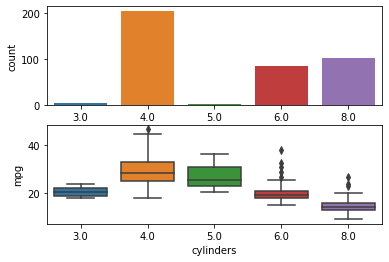

In [9]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = auto_mpg_data, x = 'cylinders', ax = ax1)

ax2 = fig.add_subplot(2,1,2) 
sns.boxplot(data = auto_mpg_data, x='cylinders', y='mpg' , ax = ax2)

C:\ProgramData\Anaconda3\envs\prueba\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\ProgramData\Anaconda3\envs\prueba\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\ProgramData\Anaconda3\envs\prueba\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\ProgramData\Anaconda3\envs\prueba\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.r

<AxesSubplot:xlabel='model_year', ylabel='mpg'>

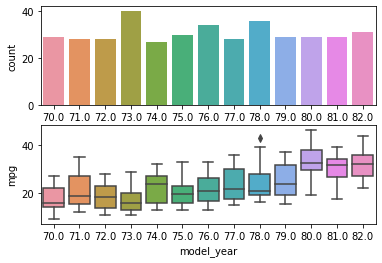

In [10]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = auto_mpg_data, x = 'model_year', ax = ax1)

ax2 = fig.add_subplot(2,1,2) 
sns.boxplot(data = auto_mpg_data, x='model_year', y='mpg' , ax = ax2)

C:\ProgramData\Anaconda3\envs\prueba\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\ProgramData\Anaconda3\envs\prueba\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


<AxesSubplot:xlabel='origin', ylabel='mpg'>

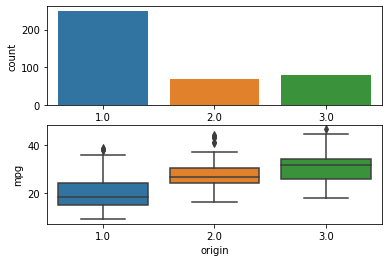

In [11]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = auto_mpg_data, x = 'origin', ax = ax1)

ax2 = fig.add_subplot(2,1,2) 
sns.boxplot(data = auto_mpg_data, x='origin', y='mpg' , ax = ax2)

### Continuous features

In [12]:
auto_mpg_data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.312814,38.345319,46.0,75.250,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8


<AxesSubplot:xlabel='acceleration', ylabel='Count'>

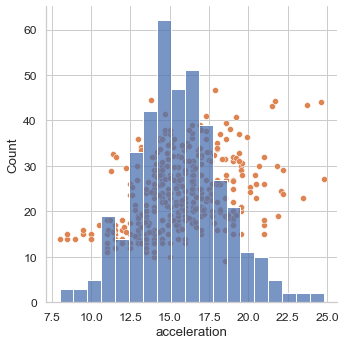

In [25]:
sns.displot(auto_mpg_data, x='acceleration')
sns.scatterplot(data=auto_mpg_data, x="acceleration", y="mpg")

<AxesSubplot:xlabel='acceleration', ylabel='mpg'>

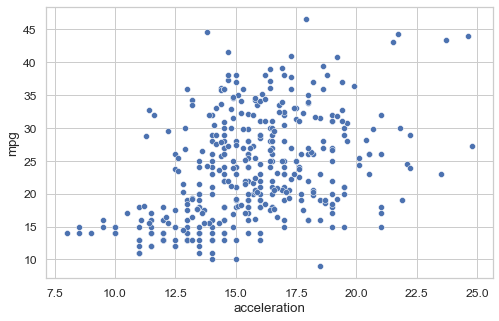

In [22]:
sns.scatterplot(data=auto_mpg_data, x="acceleration", y="mpg")

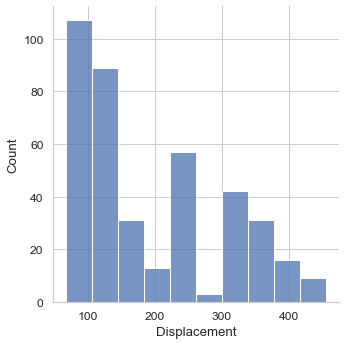

In [14]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.displot(auto_mpg_data, x='displacement').set(xlabel='Displacement', ylabel='Count');

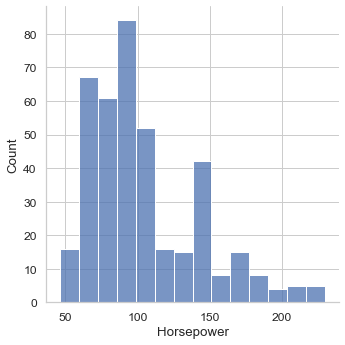

In [15]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.displot(auto_mpg_data, x='horsepower').set(xlabel='Horsepower', ylabel='Count');

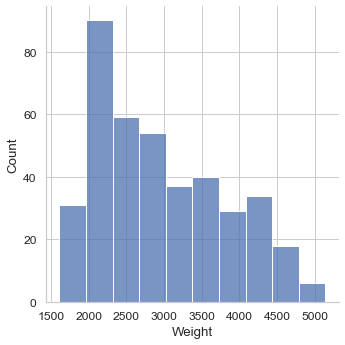

In [16]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.displot(auto_mpg_data, x='weight').set(xlabel='Weight', ylabel='Count');